In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
generation_data_plant_2 = pd.read_csv('Plant_2_Generation_Data.csv')
weather_data_plant_2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')


In [3]:
generation_data_plant_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [4]:
generation_data_plant_2.describe()


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [5]:
generation_data_plant_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [6]:
weather_data_plant_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [7]:
print(f'Number of unique inverters: {generation_data_plant_2["SOURCE_KEY"].nunique()}')

Number of unique inverters: 22


In [8]:
weather_data_plant_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [9]:
weather_data_plant_2.describe()


,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


In [10]:
df_solar_2 = pd.merge(generation_data_plant_2.drop(columns = ['PLANT_ID']), weather_data_plant_2.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')


In [11]:
df_solar_2.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0


In [12]:
generation_data_plant_1 = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data_plant_1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
generation_data_plant_1.info()
generation_data_plant_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [14]:
df_solar_1 = pd.merge(generation_data_plant_1.drop(columns = ['PLANT_ID']), weather_data_plant_1.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar_1.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_solar_2.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,6.589448e+08,27.986756,32.607233,0.229204
std,370.569597,362.112118,2919.448386,7.296678e+08,4.021294,11.226446,0.309365
min,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000
25%,0.000000,0.000000,272.750000,1.996494e+07,24.570349,23.685627,0.000000
50%,0.000000,0.000000,2911.000000,2.826276e+08,26.910352,27.433723,0.018554
75%,446.591667,438.215000,5534.000000,1.348495e+09,30.912601,40.019036,0.431027
max,1420.933333,1385.420000,9873.000000,2.247916e+09,39.181638,66.635953,1.098766


In [16]:
generation_data_plant_1.info()
generation_data_plant_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [17]:
weather_data_plant_1.info()
weather_data_plant_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [18]:
df_genaration_plant1 = generation_data_plant_1.groupby('DATE_TIME').mean(numeric_only=True).reset_index()

# แปลง DATE_TIME ให้เป็น datetime จริง และจัดเรียง
df_genaration_plant1['DATE_TIME'] = pd.to_datetime(df_genaration_plant1['DATE_TIME'], format='%d-%m-%Y %H:%M')
df_genaration_plant1 = df_genaration_plant1.sort_values('DATE_TIME').reset_index(drop=True)
df_genaration_plant1.head()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001.0,0.0,0.0,0.0,6.837223e+06
1,2020-05-15 00:15:00,4135001.0,0.0,0.0,0.0,6.837223e+06
2,2020-05-15 00:30:00,4135001.0,0.0,0.0,0.0,6.837223e+06
3,2020-05-15 00:45:00,4135001.0,0.0,0.0,0.0,6.837223e+06
4,2020-05-15 01:00:00,4135001.0,0.0,0.0,0.0,6.852802e+06


In [19]:
df_genaration_plant1['DATE_TIME'] = pd.to_datetime(df_genaration_plant1['DATE_TIME'])
weather_data_plant_1['DATE_TIME'] = pd.to_datetime(weather_data_plant_1['DATE_TIME'])

df_solar_1 = pd.merge(df_genaration_plant1.drop(columns=['PLANT_ID']), weather_data_plant_1.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

df_solar_1.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3157,3157.000000,3157.000000,3157.000000,3.157000e+03,3157.000000,3157.000000,3157.000000
mean,2020-06-01 06:41:41.298701568,3117.309001,304.857459,3324.402716,6.977422e+06,25.560257,31.175453,0.230103
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6.635010e+06,20.398505,18.140415,0.000000
25%,2020-05-23 23:15:00,0.000000,0.000000,4.124188,6.917337e+06,22.739895,21.130249,0.000000
50%,2020-06-01 12:30:00,383.190747,37.040016,3009.619318,6.981686e+06,24.680324,24.801971,0.027748
75%,2020-06-09 18:00:00,6382.267857,625.096023,6094.517045,7.045256e+06,27.941221,41.449481,0.451576
max,2020-06-17 23:45:00,13588.081169,1325.009659,8807.727273,7.097398e+06,35.252486,65.545714,1.221652
std,NaN,4002.425859,391.090163,3045.292432,7.513782e+04,3.351059,12.272685,0.301348


In [20]:
df_genaration_plant2 = generation_data_plant_2.groupby('DATE_TIME').mean(numeric_only=True).reset_index()


df_genaration_plant2['DATE_TIME'] = pd.to_datetime(df_genaration_plant2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
df_genaration_plant2 = df_genaration_plant2.sort_values('DATE_TIME').reset_index(drop=True)

df_genaration_plant2['DATE_TIME'] = pd.to_datetime(df_genaration_plant2['DATE_TIME'])
weather_data_plant_2['DATE_TIME'] = pd.to_datetime(weather_data_plant_2['DATE_TIME'])

df_solar_2 = pd.merge(df_genaration_plant2.drop(columns=['PLANT_ID']), weather_data_plant_2.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

df_solar_2.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259,3259.000000,3259.000000,3259.000000,3.259000e+03,3259.000000,3259.000000,3259.000000
mean,2020-06-01 00:04:35.053697536,248.818478,243.339215,3283.334245,6.636655e+08,28.069400,32.772408,0.232737
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000
25%,2020-05-23 12:07:30,0.000000,0.000000,902.791991,6.450146e+08,24.602135,23.716881,0.000000
50%,2020-06-01 00:00:00,23.618307,22.809630,3487.807792,6.451436e+08,26.981263,27.534606,0.019040
75%,2020-06-09 12:07:30,533.909648,522.740660,5257.590909,6.746497e+08,31.056757,40.480653,0.438717
max,2020-06-17 23:45:00,1210.477576,1180.898203,7923.055556,8.769846e+08,39.181638,66.635953,1.098766
std,NaN,313.503377,306.485223,2339.704265,6.796735e+07,4.061556,11.344034,0.312693


In [21]:
df_combined_plant_solar = pd.concat([df_solar_2, df_solar_1], ignore_index=True)

df_combined_plant_solar.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,6416,6416.000000,6416.000000,6416.000000,6.416000e+03,6416.000000,6416.000000,6416.000000
mean,2020-06-01 03:19:58.784289536,1660.262459,273.609336,3303.542032,3.405414e+08,26.834773,31.986625,0.231441
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,20.398505,18.140415,0.000000
25%,2020-05-23 17:30:00,0.000000,0.000000,523.496753,6.983850e+06,23.673180,22.466628,0.000000
50%,2020-06-01 06:15:00,59.179545,29.848433,3342.363636,5.395622e+08,25.973933,26.478017,0.023582
75%,2020-06-09 15:03:45,865.906358,566.824697,5746.359050,6.451473e+08,29.366598,40.932470,0.445586
max,2020-06-17 23:45:00,13588.081169,1325.009659,8807.727273,8.769846e+08,39.181638,66.635953,1.221652
std,NaN,3160.360365,351.994233,2709.811056,3.318818e+08,3.934008,11.836145,0.307142


In [22]:
df_combined_plant_solar.to_csv("Plant_Prediction_Data_Grouped.csv", index=False)

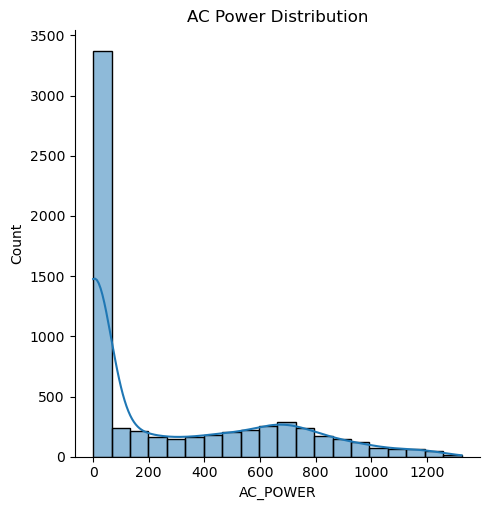

In [23]:
sns.displot(df_combined_plant_solar['AC_POWER'], kde=True, bins = 20).set(title = "AC Power Distribution")
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [25]:
df_combined_plant_solar = pd.read_csv('Plant_Prediction_Data_Grouped.csv')
df_combined_plant_solar.head()
df_combined_plant_solar.describe()
df_combined_plant_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            6416 non-null   object 
 1   DC_POWER             6416 non-null   float64
 2   AC_POWER             6416 non-null   float64
 3   DAILY_YIELD          6416 non-null   float64
 4   TOTAL_YIELD          6416 non-null   float64
 5   AMBIENT_TEMPERATURE  6416 non-null   float64
 6   MODULE_TEMPERATURE   6416 non-null   float64
 7   IRRADIATION          6416 non-null   float64
dtypes: float64(7), object(1)
memory usage: 401.1+ KB


In [26]:
df_combined_plant_solar.nunique()

DATE_TIME              3262
DC_POWER               3410
AC_POWER               3410
DAILY_YIELD            3874
TOTAL_YIELD            3641
AMBIENT_TEMPERATURE    6416
MODULE_TEMPERATURE     6416
IRRADIATION            3617
dtype: int64

In [27]:
df_combined_plant_solar['DATE_TIME'] = pd.to_datetime(df_combined_plant_solar['DATE_TIME'])


df_combined_plant_solar['hour'] = df_combined_plant_solar['DATE_TIME'].dt.hour
df_combined_plant_solar['day_of_week'] = df_combined_plant_solar['DATE_TIME'].dt.dayofweek
df_combined_plant_solar['month'] = df_combined_plant_solar['DATE_TIME'].dt.month

In [28]:
df_combined_plant_solar['power_ratio'] = df_combined_plant_solar.apply(lambda row: row['AC_POWER'] / row['DC_POWER'] if row['DC_POWER'] > 0 else 0, axis=1)
df_combined_plant_solar['temp_diff'] = df_combined_plant_solar['MODULE_TEMPERATURE'] - df_combined_plant_solar['AMBIENT_TEMPERATURE']

In [29]:
df_combined_plant_solar.drop(columns=['TOTAL_YIELD'], inplace=True)


In [30]:
df_combined_plant_solar.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,hour,day_of_week,month,power_ratio,temp_diff
0,2020-05-15 00:00:00,0.0,0.0,2222.724459,27.004764,25.060789,0.0,0,4,5,0.0,-1.943975
1,2020-05-15 00:15:00,0.0,0.0,1290.954545,26.880811,24.421869,0.0,0,4,5,0.0,-2.458943
2,2020-05-15 00:30:00,0.0,0.0,1290.954545,26.682055,24.427290,0.0,0,4,5,0.0,-2.254765
3,2020-05-15 00:45:00,0.0,0.0,1290.954545,26.500589,24.420678,0.0,0,4,5,0.0,-2.079911
4,2020-05-15 01:00:00,0.0,0.0,1205.272727,26.596148,25.088210,0.0,1,4,5,0.0,-1.507938


Text(0.5, 1.0, 'Distribution of IRRADIATION')

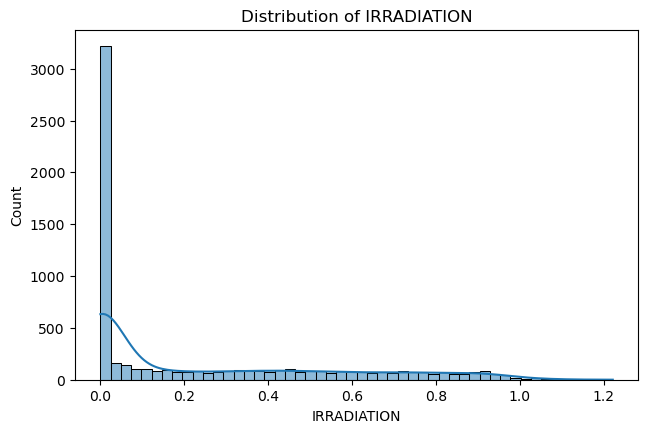

In [31]:
# 1. Histogram of IRRADIATION
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_combined_plant_solar['IRRADIATION'], bins=50, kde=True)
plt.title('Distribution of IRRADIATION')


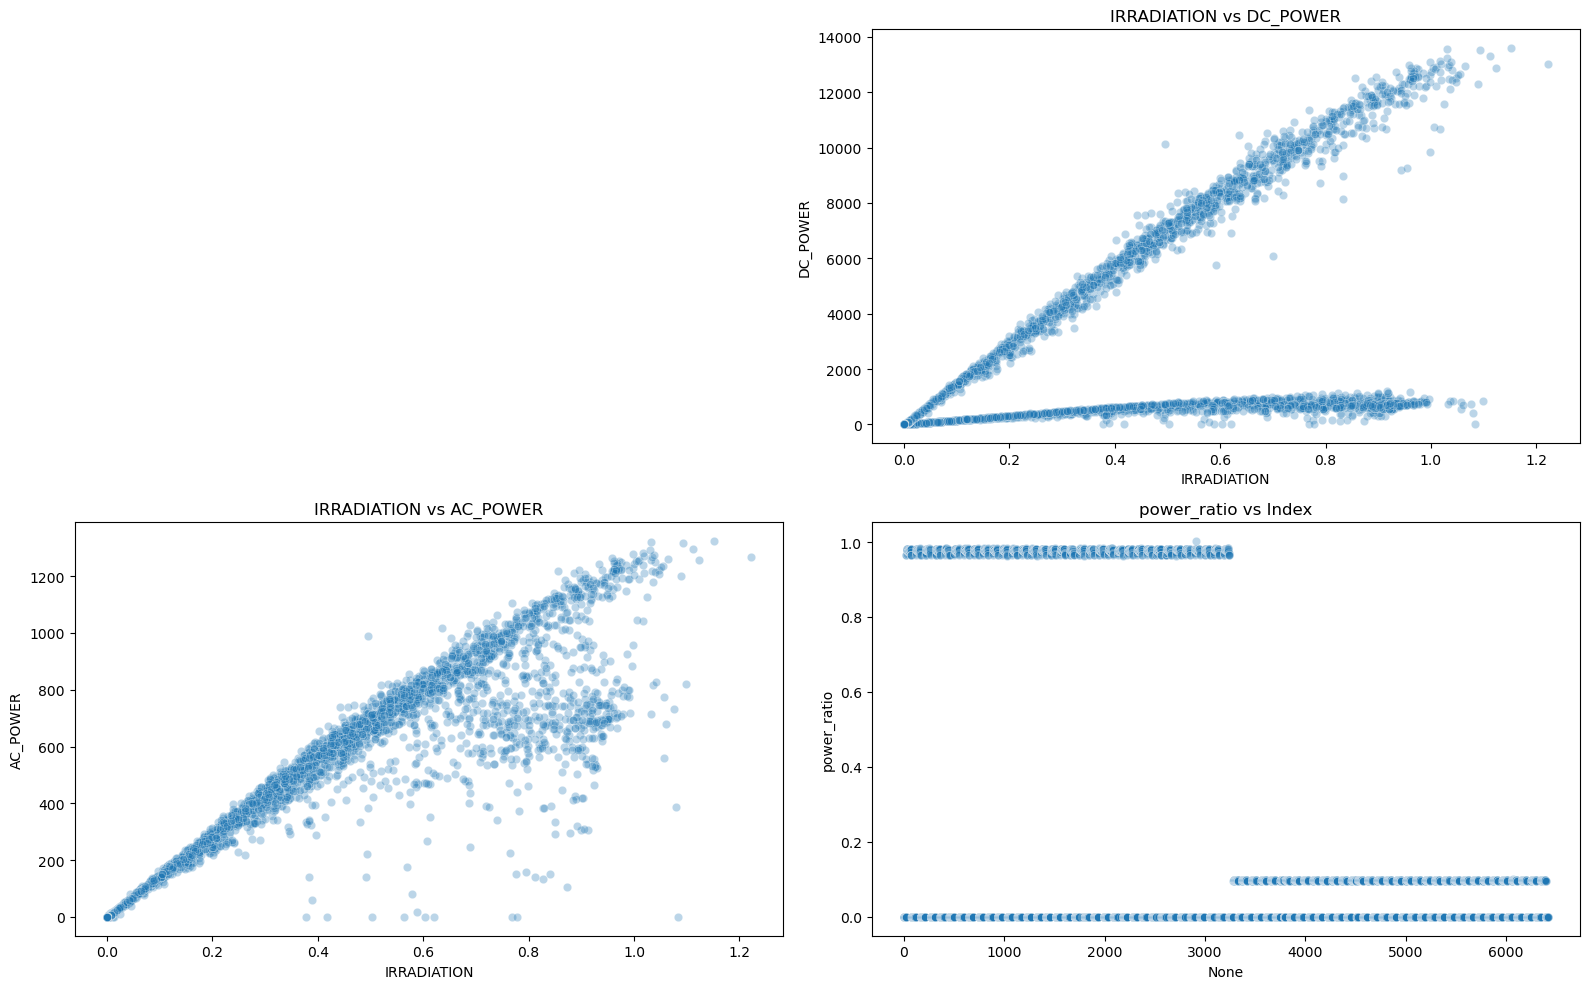

In [32]:
# 2. IRRADIATION vs DC_POWER
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_combined_plant_solar, x='IRRADIATION', y='DC_POWER', alpha=0.3)
plt.title('IRRADIATION vs DC_POWER')
# 3. IRRADIATION vs AC_POWER
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_combined_plant_solar, x='IRRADIATION', y='AC_POWER', alpha=0.3)
plt.title('IRRADIATION vs AC_POWER')
# 4. power_ratio
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_combined_plant_solar.index, y=df_combined_plant_solar['power_ratio'], alpha=0.3)
plt.title('power_ratio vs Index')
plt.tight_layout()

Text(0.5, 1.0, 'MODULE_TEMPERATURE vs DAILY_YIELD')

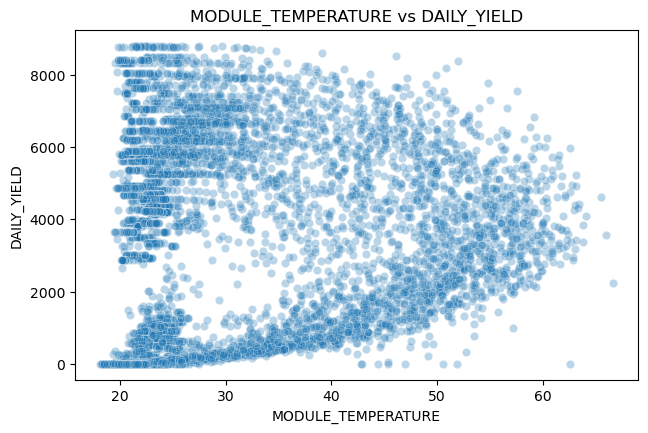

In [33]:
# 3. MODULE_TEMPERATURE vs DAILY_YIELD
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 3)
sns.scatterplot(data=df_combined_plant_solar, x='MODULE_TEMPERATURE', y='DAILY_YIELD', alpha=0.3)
plt.title('MODULE_TEMPERATURE vs DAILY_YIELD')

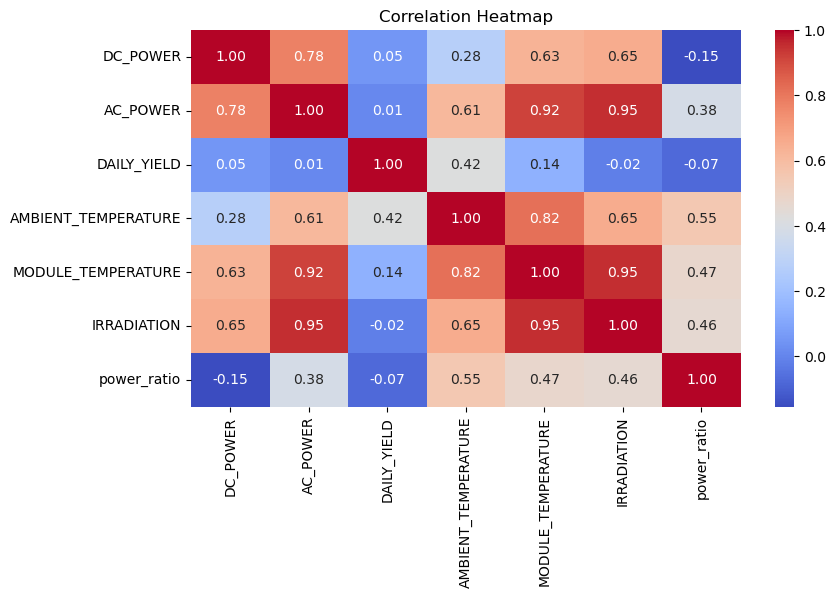

In [34]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 4)
corr = df_combined_plant_solar[['DC_POWER', 'AC_POWER', 'DAILY_YIELD',
           'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','power_ratio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
features_to_normalize = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD',
                         'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
                         'power_ratio', 'temp_diff']

# ทำ normalization
scaler = StandardScaler()
df_normalized = df_combined_plant_solar.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df_combined_plant_solar[features_to_normalize])

# ------------------------------
# STEP 5: Prepare X, y for model
# ------------------------------
X = df_normalized[['IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
                   'temp_diff','power_ratio']]
y = df_normalized['AC_POWER']


print(X.head())
print(y.head())

   IRRADIATION  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  temp_diff  \
0    -0.753589             0.043214           -0.585188  -0.796436   
1    -0.753589             0.011704           -0.639173  -0.854236   
2    -0.753589            -0.038823           -0.638715  -0.831319   
3    -0.753589            -0.084954           -0.639274  -0.811694   
4    -0.753589            -0.060662           -0.582872  -0.747495   

   power_ratio  
0    -0.686671  
1    -0.686671  
2    -0.686671  
3    -0.686671  
4    -0.686671  
0   -0.777373
1   -0.777373
2   -0.777373
3   -0.777373
4   -0.777373
Name: AC_POWER, dtype: float64


In [36]:
df_normalized.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,hour,day_of_week,month,power_ratio,temp_diff
0,2020-05-15 00:00:00,-0.525381,-0.777373,-0.398885,0.043214,-0.585188,-0.753589,0,4,5,-0.686671,-0.796436
1,2020-05-15 00:15:00,-0.525381,-0.777373,-0.742762,0.011704,-0.639173,-0.753589,0,4,5,-0.686671,-0.854236
2,2020-05-15 00:30:00,-0.525381,-0.777373,-0.742762,-0.038823,-0.638715,-0.753589,0,4,5,-0.686671,-0.831319
3,2020-05-15 00:45:00,-0.525381,-0.777373,-0.742762,-0.084954,-0.639274,-0.753589,0,4,5,-0.686671,-0.811694
4,2020-05-15 01:00:00,-0.525381,-0.777373,-0.774383,-0.060662,-0.582872,-0.753589,1,4,5,-0.686671,-0.747495


In [37]:
df_combined_plant_solar.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,hour,day_of_week,month,power_ratio,temp_diff
0,2020-05-15 00:00:00,0.0,0.0,2222.724459,27.004764,25.060789,0.0,0,4,5,0.0,-1.943975
1,2020-05-15 00:15:00,0.0,0.0,1290.954545,26.880811,24.421869,0.0,0,4,5,0.0,-2.458943
2,2020-05-15 00:30:00,0.0,0.0,1290.954545,26.682055,24.427290,0.0,0,4,5,0.0,-2.254765
3,2020-05-15 00:45:00,0.0,0.0,1290.954545,26.500589,24.420678,0.0,0,4,5,0.0,-2.079911
4,2020-05-15 01:00:00,0.0,0.0,1205.272727,26.596148,25.088210,0.0,1,4,5,0.0,-1.507938


In [38]:
df_combined_plant_solar = df_combined_plant_solar[df_combined_plant_solar['AC_POWER'] != 0]
df_combined_plant_solar.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,hour,day_of_week,month,power_ratio,temp_diff
24,2020-05-15 06:00:00,15.090606,14.565152,1.178788,24.742787,24.077230,0.012962,6,4,5,0.965180,-0.665557
25,2020-05-15 06:15:00,26.689978,25.771710,6.438312,24.763911,24.356189,0.021038,6,4,5,0.965595,-0.407721
26,2020-05-15 06:30:00,58.372987,56.525281,15.687662,24.786323,24.548886,0.042435,6,4,5,0.968347,-0.237437
27,2020-05-15 06:45:00,156.858961,153.348117,39.716450,25.048245,25.746662,0.103496,6,4,5,0.977618,0.698417
28,2020-05-15 07:00:00,306.056970,300.653636,96.987879,25.673202,28.674707,0.199450,7,4,5,0.982345,3.001505


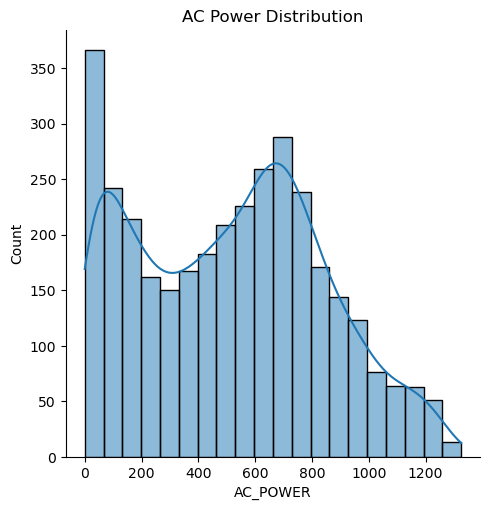

In [39]:
sns.displot(df_combined_plant_solar['AC_POWER'], kde=True, bins = 20).set(title = "AC Power Distribution")
plt.show()

Text(0.5, 1.0, 'Distribution of IRRADIATION')

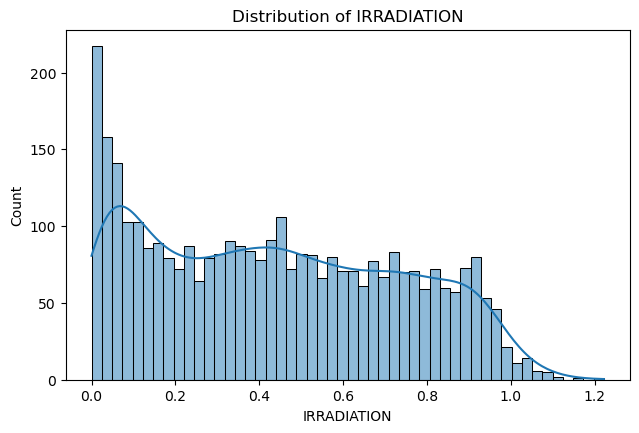

In [40]:
# 1. Histogram of IRRADIATION
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_combined_plant_solar['IRRADIATION'], bins=50, kde=True)
plt.title('Distribution of IRRADIATION')

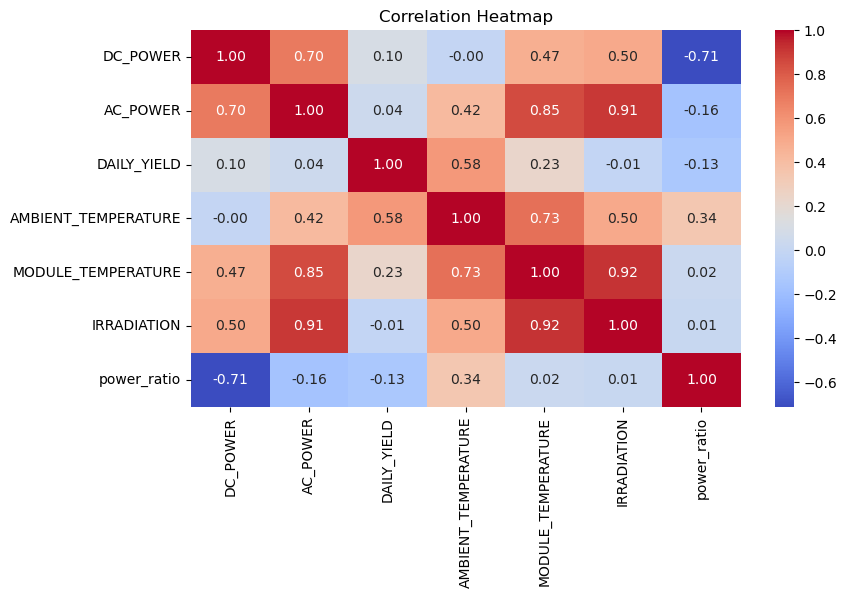

In [41]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 4)
corr = df_combined_plant_solar[['DC_POWER', 'AC_POWER', 'DAILY_YIELD',
           'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','power_ratio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [53]:
X = df_combined_plant_solar[['IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
                   'temp_diff','power_ratio']]
y = df_combined_plant_solar['AC_POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ------------------------------
# STEP 6: Train the model
# ------------------------------
rf = RandomForestRegressor(n_estimators= 50000, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50000, random_state=42)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the values
y_pred = rf.predict(X_test)

# Calculate mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 4540.26
R2 Score: 0.96


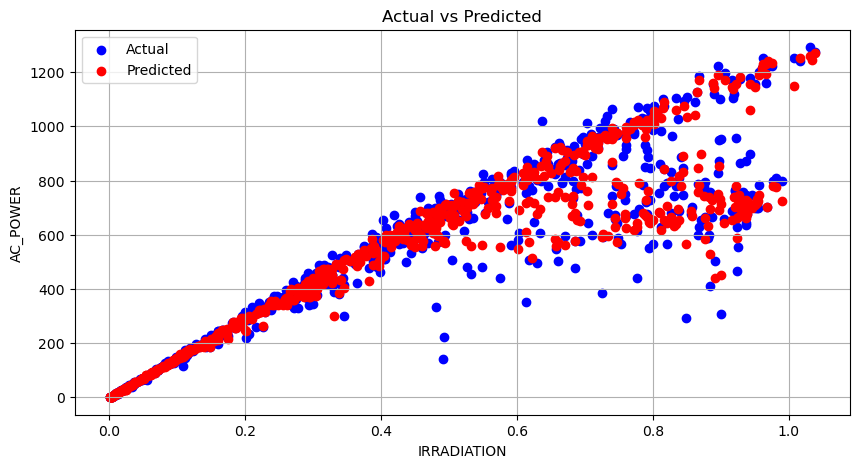

In [64]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['IRRADIATION'], y_test, label='Actual', color='blue')
plt.scatter(X_test['IRRADIATION'], y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('IRRADIATION')
plt.ylabel('AC_POWER')
plt.legend()
plt.grid(True)
plt.show()